# <h1 align="center"> THEME 5 - Résolution numérique de systèmes dynamiques </h1>

### 🎯 Objectifs

- Résoudre des ODE linéaires et non-linéaires
- Résoudre un système d'ODE

### 📚 Notions 

- [Exemple 1](#ex1):
- [Exemple 2](#ex2):
- [Exemple 3](#ex3):

Un [lexique](#lexique) avec l'ensemble des fonctions qui ont été vues est disponible à la fin du notebook.

### 🧰 Librairies

- **Scipy**: est une librairie Python open-source utilisée pour le calcul scientifique. SciPy contient des modules pour l'optimisation, l'algèbre linéaire, l'intégration, l'interpolation, les fonctions spéciales, la FFT, le traitement du signal et de l'image, les solveurs ODE et d'autres tâches courantes en sciences et en ingénierie.

### 🔗 Référence

- [Documentation Scipy](https://docs.scipy.org/doc/scipy/reference/index.html#scipy-api)

### ⚙️ Installation

`pip install scipy`

## <a name="ex1"><h2 align="center"> Exemple 1 - Cinématique Michaelis Menten </h2></a>

### 📝 Contexte

En biochimie, la cinématique de Michaelis-Menten est un modèle de cinématique très connu qui est utilisée pour décrire la cinématique d'une réaction catalysée par une enzyme agissant sur un substrat unique pour donner irréversiblement un produit. Elle relie la vitesse stationnaire initiale de la réaction à la concentration initiale en substrat et à des paramètres caractéristiques de l'enzyme. 

Le modèle de cette réaction est sous la forme suivante:

$$
\begin{aligned}
\mathrm{E}+\mathrm{S} \underset{k_{r}}{\stackrel{k_{f}}{\rightleftharpoons}} \mathrm{ES} \stackrel{k_{\mathrm{cat}}}{\longrightarrow} \mathrm{E}+\mathrm{P}
\end{aligned}
$$

Où $k_{f}$ (constante de vitesse en avant), $k_{r}$ (constante de vitesse en arrière) et $k_{cat}$ (constante de vitesse catalytique) désignent les constantes de vitesse, les doubles flèches entre S (substrat) et ES (complexe enzyme-substrat) représentent le fait que la liaison enzyme-substrat est un processus réversible, et la flèche unique en avant représente la formation de P (produit).

En appliquant la loi de conservation de la masse on obtient 4 ODEs non-linéaires:

$$
\begin{aligned}
\frac{\mathrm{d}[\mathrm{E}]}{\mathrm{d} t} &=-k_{f}[\mathrm{E}][\mathrm{S}]+k_{r}[\mathrm{ES}]+k_{\mathrm{cat}}[\mathrm{ES}] \\
\frac{\mathrm{d}[\mathrm{S}]}{\mathrm{d} t} &=-k_{f}[\mathrm{E}][\mathrm{S}]+k_{r}[\mathrm{ES}] \\
\frac{\mathrm{d}[\mathrm{ES}]}{\mathrm{d} t} &=k_{f}[\mathrm{E}][\mathrm{S}]-k_{r}[\mathrm{ES}]-k_{\mathrm{cat}}[\mathrm{ES}] \\
\frac{\mathrm{d}[\mathrm{P}]}{\mathrm{d} t} &=k_{\mathrm{cat}}[\mathrm{ES}]
\end{aligned}
$$


L'équation de michaelis-menten permet de trouver la vitesse de réaction en fonction de la concentration de substrat.

$$
v = \frac{\mathrm{d}[\mathrm{P}]}{\mathrm{d} t}=V_{\max } \frac{[\mathrm{S}]}{K_{\mathrm{M}}+[\mathrm{S}]}=k_{\mathrm{cat}}[\mathrm{E}]_{0} \frac{[\mathrm{S}]}{K_{\mathrm{M}}+[\mathrm{S}]}
$$

### ⭐ Objectif

- Créer un jeu de données à partir d'un dictionnaire Python contenant les données de fleurs d'iris.
- Indexer et filtrer les données.

### 💻 Code



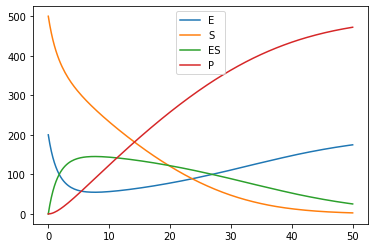

In [7]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

# define rate equations for reactions
def rate_equations(t, Y, k_f, k_r, k_cat):
    # Y ordered E,S,ES,P
    dy = [0] * 4
    dy[0] = -k_f * Y[0] * Y[1] + (k_r + k_cat) * Y[2]
    dy[1] = -k_f * Y[0] * Y[1] + k_r * Y[2]
    dy[2] = k_f * Y[0] * Y[1] - (k_r + k_cat) * Y[2]
    dy[3] = k_cat * Y[2]
    return dy

# mol.s-1
k_f = 1e-3
k_r = 1e-4
k_cat = 0.1
k = (k_f, k_r, k_cat)
t = np.linspace(0, 50, 200)

E0 = 200
S0 = 500
y0 = [E0, S0, 0, 0]  # E,S,ES,P

# integrate rate equations
rates = spi.solve_ivp(rate_equations, t_span=(0, 50), y0=y0, args=k, t_eval=t)

plt.plot(t, rates.y[0], label="E")
plt.plot(t, rates.y[1], label="S")
plt.plot(t, rates.y[2], label="ES")
plt.plot(t, rates.y[3], label="P")
plt.legend()
plt.show()

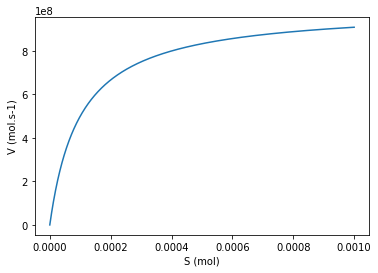

In [2]:
K_m = (k_r + k_cat) / k_f
V_max = k_cat / E0


def michaelis_menten(S, K_m, V_max):
    return (V_max * S) / (S + K_m)


S = np.linspace(0, 1e-3, 1000)
v = michaelis_menten(S, K_m, V_max)

plt.plot(S, v)
plt.xlabel("S (mol)")
plt.ylabel("V (mol.s-1)")
plt.show()